<a href="https://colab.research.google.com/github/charlesincharge/CS155/blob/revise-set-1/2022/sets/set1/src/3_notebook_part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem 3, Parts G-I: Stochastic Gradient Descent with a Larger Dataset

Use this notebook to write your code for problem 3 parts G-I by filling in the sections marked `# TODO` and running all cells.

In [2]:
# Setup.

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Problem 3G: Perform SGD with the new dataset

For the functions below, you may re-use your code from parts 3D-F. Note that you can now modify your SGD function to return the final weight vector instead of the weights after every epoch.

In [9]:
def loss(X, Y, w):
    '''
    Calculate the squared loss function.
    
    Inputs:
        X: A (N, D) shaped numpy array containing the data points.
        Y: A (N, ) shaped numpy array containing the (float) labels of the data points.
        w: A (D, ) shaped numpy array containing the weight vector.
    
    Outputs:
        The loss evaluated with respect to X, Y, and w.
    '''
    return np.sum((Y - np.matmul(X,w))**2)

def gradient(x, y, w):
    '''
    Calculate the gradient of the loss function with respect to the weight vector w,
    evaluated at a single point (x, y) and weight vector w.
    
    Inputs:
        x: A (D, ) shaped numpy array containing a single data point.
        y: The float label for the data point.
        w: A (D, ) shaped numpy array containing the weight vector.
        
    Output:
        The gradient of the loss with respect to w. 
    '''

    return -2*(y-np.dot(w, x))*x

def SGD(X, Y, w_start, eta, N_epochs):
    '''
    Perform SGD using dataset (X, Y), initial weight vector w_start,
    learning rate eta, and N_epochs epochs.
    
    Inputs:
        X: A (N, D) shaped numpy array containing the data points.
        Y: A (N, ) shaped numpy array containing the (float) labels of the data points.
        w_start:  A (D, ) shaped numpy array containing the weight vector initialization.
        eta: The step size.
        N_epochs: The number of epochs (iterations) to run SGD.
        
    Outputs:
        W: A (N_epochs, D) shaped array containing the weight vectors from all iterations.
        losses: A (N_epochs, ) shaped array containing the losses from all iterations.
    '''
    
    N = np.shape(X)[0]
    
    w = w_start
    
    for e in range(0,N_epochs):
        
        # Randomly go through points and update
        for i in np.random.permutation(N):
            w -= eta*gradient(X[i], Y[i], w)
        
    return w

Next, we need to load the dataset. In doing so, the following function may be helpful:

In [4]:
def load_data(filename):
    """
    Function loads data stored in the file filename and returns it as a numpy ndarray.
    
    Inputs:
        filename: GeneratorExitiven as a string.
    
    Outputs:
        Data contained in the file, returned as a numpy ndarray
    """
    return np.loadtxt(filename, skiprows=1, delimiter=',')

Now, load the dataset in `sgd_data.csv` and run SGD using the given parameters; print out the final weights.

In [5]:
#==============================================
# TODO:
# (1) load the dataset
# (2) run SGD using the given parameters
# (3) print out the final weights.
#==============================================

# The following should help you get started:
data = load_data('https://raw.githubusercontent.com/emiletimothy/Caltech-CS155-2023/main/set1/src/data/sgd_data.csv')

X = np.concatenate((np.ones((len(data),1)), data[:, :-1]), axis=1)
Y = data[:, -1]

eta = np.exp(-15)
winit = [0.001, 0.001, 0.001, 0.001, 0.001]
Nepochs = 1000

w = SGD(X, Y, winit, eta, Nepochs)
print(w)

[ -0.22788851  -5.97855119   3.98837025 -11.85702543   8.91128073]


## Problem 3H: Convergence of SGD

This problem examines the convergence of SGD for different learning rates. Please implement your code in the cell below:

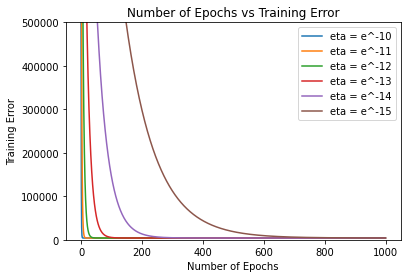

In [12]:
def SGD(X, Y, w_start, eta, N_epochs):
    N = np.shape(X)[0]
    D = np.shape(X)[1]
    
    W = np.zeros(shape=(N_epochs,D))
    
    losses = np.zeros(shape=(N_epochs, ))
    
    w = w_start
    
    for e in range(0,Nepochs):
        
        # Randomly go through points and update
        for i in np.random.permutation(N):
            w -= eta*gradient(X[i], Y[i], w)
            
        W[e] = w
        losses[e] = loss(X, Y, w)
        
    return W, losses


etas = [np.exp(-10),np.exp(-11),np.exp(-12),np.exp(-13),np.exp(-14),np.exp(-15)]

plt.figure()
for eta in etas:
    SGDdata = SGD(X, Y, winit, eta, Nepochs)
    plt.plot(range(Nepochs), SGDdata[1])

plt.legend(["eta = e^-10", "eta = e^-11", "eta = e^-12", "eta = e^-13", "eta = e^-14", "eta = e^-15"])
plt.xlabel("Number of Epochs")
plt.ylabel("Training Error")
plt.title("Number of Epochs vs Training Error")
plt.ylim((0, 500000))
plt.show()

## Problem 3I

Provide your code for computing the least-squares analytical solution below.

In [32]:
w = np.matmul( np.linalg.inv(np.matmul(np.transpose(X),X)), np.matmul(Y,X))
w

array([ -0.31644251,  -5.99157048,   4.01509955, -11.93325972,
         8.99061096])